In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
import math
import numpy as np
from scipy.stats import pearsonr

In [3]:
pubchem_df = pd.read_csv("pubchem_sol.csv")

In [4]:
pubchem_df.head()

,SMILES,NAME,VAL
0,c1ccc(cc1)N=Nc2ccc(nc2N)N.Cl,85273730,-3.914544
1,Cc1c(c(n[nH]1)C)NC(=O)CN2CCN(CC2)S(=O)(=O)c3cc...,85273684,-3.918805
2,CC(C(=O)Nc1ccc(cc1)C(F)(F)F)N(C)CC(=O)N2CCN(CC...,85273682,-4.025528
3,Cc1cccc(c1)S(=O)(=O)Nc2ccc(cc2C)N3CCN(CC3)C.Cl,85273681,-3.881633
4,Cc1ccc(cc1C(=O)N2CCN(CC2)c3ccccc3OC)S(=O)(=O)N...,85273665,-3.860621


In [5]:
pubchem_df.shape

(37099, 3)

In [6]:
def cansmi(smiles_in):
    mol = Chem.MolFromSmiles(smiles_in)
    return Chem.MolToSmiles(mol)

In [11]:
%time pubchem_df['cansmi'] = [cansmi(x) for x in pubchem_df.SMILES]

CPU times: user 10.7 s, sys: 0 ns, total: 10.7 s
Wall time: 10.7 s


In [9]:
pubchem_df.head()

,SMILES,NAME,VAL,cansmi
0,c1ccc(cc1)N=Nc2ccc(nc2N)N.Cl,85273730,-3.914544,Cl.Nc1ccc(N=Nc2ccccc2)c(N)n1
1,Cc1c(c(n[nH]1)C)NC(=O)CN2CCN(CC2)S(=O)(=O)c3cc...,85273684,-3.918805,COc1ccc(S(=O)(=O)N2CCN(CC(=O)Nc3c(C)n[nH]c3C)C...
2,CC(C(=O)Nc1ccc(cc1)C(F)(F)F)N(C)CC(=O)N2CCN(CC...,85273682,-4.025528,CC(C(=O)Nc1ccc(C(F)(F)F)cc1)N(C)CC(=O)N1CCN(Cc...
3,Cc1cccc(c1)S(=O)(=O)Nc2ccc(cc2C)N3CCN(CC3)C.Cl,85273681,-3.881633,Cc1cccc(S(=O)(=O)Nc2ccc(N3CCN(C)CC3)cc2C)c1.Cl
4,Cc1ccc(cc1C(=O)N2CCN(CC2)c3ccccc3OC)S(=O)(=O)N...,85273665,-3.860621,COc1ccccc1N1CCN(C(=O)c2cc(S(=O)(=O)N3CCCCC3)cc...


In [10]:
az_df = pd.read_csv("az_solubility.csv")

In [11]:
az_df.head()

,canonical_smiles,molregno,standard_relation,standard_value
0,OC(=O)c1cc2cc(Cl)ccc2n1Cc3ccc(Cl)c(Cl)c3,217385,NaN,81300.0
1,COc1cc(OC2CNC2)ccc1Nc3ncc(Cl)c(n3)c4cnc5ccccn45,1166753,NaN,81300.0
2,CCOC(=O)Nc1ccc2Sc3ccccc3N(C(=O)CCN4CCOCC4)c2c1,139866,NaN,83200.0
3,Nc1nc(cs1)c2ccc(Cl)cc2,1061805,NaN,83200.0
4,CC(C)c1ccc2[nH]c3CCN(Cc3c2c1)C(=O)[C@@H]4CCCC[...,1428120,NaN,83200.0


In [13]:
az_df['cansmi'] = [cansmi(x) for x in az_df.canonical_smiles]

In [14]:
az_df.head()

,canonical_smiles,molregno,standard_relation,standard_value,cansmi
0,OC(=O)c1cc2cc(Cl)ccc2n1Cc3ccc(Cl)c(Cl)c3,217385,NaN,81300.0,O=C(O)c1cc2cc(Cl)ccc2n1Cc1ccc(Cl)c(Cl)c1
1,COc1cc(OC2CNC2)ccc1Nc3ncc(Cl)c(n3)c4cnc5ccccn45,1166753,NaN,81300.0,COc1cc(OC2CNC2)ccc1Nc1ncc(Cl)c(-c2cnc3ccccn23)n1
2,CCOC(=O)Nc1ccc2Sc3ccccc3N(C(=O)CCN4CCOCC4)c2c1,139866,NaN,83200.0,CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN1CCOCC1)c1ccccc1S2
3,Nc1nc(cs1)c2ccc(Cl)cc2,1061805,NaN,83200.0,Nc1nc(-c2ccc(Cl)cc2)cs1
4,CC(C)c1ccc2[nH]c3CCN(Cc3c2c1)C(=O)[C@@H]4CCCC[...,1428120,NaN,83200.0,CC(C)c1ccc2[nH]c3c(c2c1)CN(C(=O)[C@@H]1CCCC[C@...


In [16]:
combo_df = pubchem_df.merge(az_df,on="cansmi")

In [17]:
combo_df.shape

(43, 8)

In [32]:
combo_df['AZ_LogS'] = -np.log10([combo_df.standard_value * 1e-9])[0]

In [33]:
combo_df['PubChem_LogS'] = [-x for x in combo_df.VAL]

In [34]:
combo_df.head()

,SMILES,NAME,VAL,cansmi,canonical_smiles,molregno,standard_relation,standard_value,PubChem_LogS,AZ_LogS
0,c1ccc(cc1)C(=O)C2CCN(CC2)C(=O)c3ccco3,50085550,-3.833187,O=C(c1ccccc1)C1CCN(C(=O)c2ccco2)CC1,O=C(C1CCN(CC1)C(=O)c2occc2)c3ccccc3,1085536,NaN,426600.0,3.833187,3.369979
1,Cc1cccc(c1NC(=O)N2CCC(CC2)C(=O)c3ccc(cc3)F)C,49729798,-4.361995,Cc1cccc(C)c1NC(=O)N1CCC(C(=O)c2ccc(F)cc2)CC1,Cc1cccc(C)c1NC(=O)N2CCC(CC2)C(=O)c3ccc(F)cc3,1105080,NaN,18600.0,4.361995,4.730487
2,c1ccc(cc1)c2c(oc(n2)O)c3ccccc3,49674621,-4.204951,Oc1nc(-c2ccccc2)c(-c2ccccc2)o1,Oc1oc(c2ccccc2)c(n1)c3ccccc3,909730,NaN,107200.0,4.204951,3.969805
3,c1ccc(cc1)Sc2c(cccn2)C(=O)NC3CCCCC3,49673950,-4.445534,O=C(NC1CCCCC1)c1cccnc1Sc1ccccc1,O=C(NC1CCCCC1)c2cccnc2Sc3ccccc3,1210726,NaN,22900.0,4.445534,4.640165
4,c1ccc(cc1)Cn2c3c(c(ncn3)O)nn2,49672163,-3.974433,Oc1ncnc2c1nnn2Cc1ccccc1,Oc1ncnc2c1nnn2Cc3ccccc3,1241519,NaN,208900.0,3.974433,3.680062


Text(3.5, 5.5, 'N=48\nR$^2$=0.73')

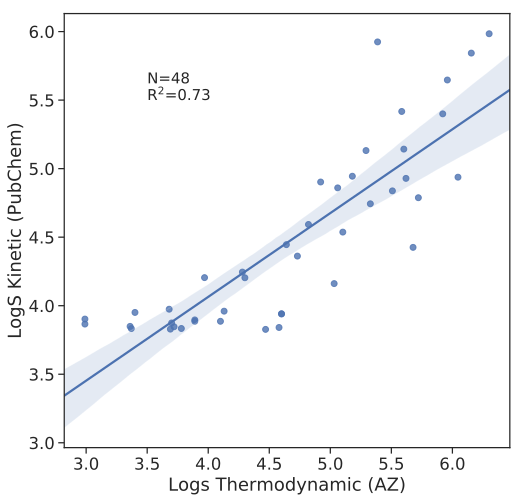

In [77]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x="AZ_LogS",y="PubChem_LogS",data=combo_df)
ax.set(xlabel="Logs Thermodynamic (AZ)",ylabel="LogS Kinetic (PubChem)")
r2 = pearsonr(combo_df.AZ_LogS,combo_df.PubChem_LogS)[0]**2
ax.text(3.5,5.5,f"N=48\nR$^2$={r2:.2f}",fontsize=15)

In [48]:
combo_df.describe()

,NAME,VAL,molregno,standard_relation,standard_value,PubChem_LogS,AZ_LogS
count,4.300000e+01,43.000000,4.300000e+01,0.0,4.300000e+01,43.000000,43.000000
mean,3.457949e+07,-4.477923,8.574025e+05,NaN,1.195860e+05,4.477923,4.676312
std,1.326442e+07,0.657321,2.902603e+05,NaN,2.322656e+05,0.657321,0.919090
min,8.559690e+05,-5.984274,3.859000e+03,NaN,5.000000e+02,3.827264,2.989997
25%,2.666041e+07,-4.915799,7.667405e+05,NaN,3.600000e+03,3.891421,3.890084
50%,2.672996e+07,-4.245339,8.929330e+05,NaN,2.290000e+04,4.245339,4.640165
75%,4.966640e+07,-3.891421,1.058248e+06,NaN,1.288000e+05,4.915799,5.447927
max,5.642210e+07,-3.827264,1.241519e+06,NaN,1.023300e+06,5.984274,6.301030
